In [1]:

import  pandas as pd
df=pd.read_csv("datasets/housing/housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

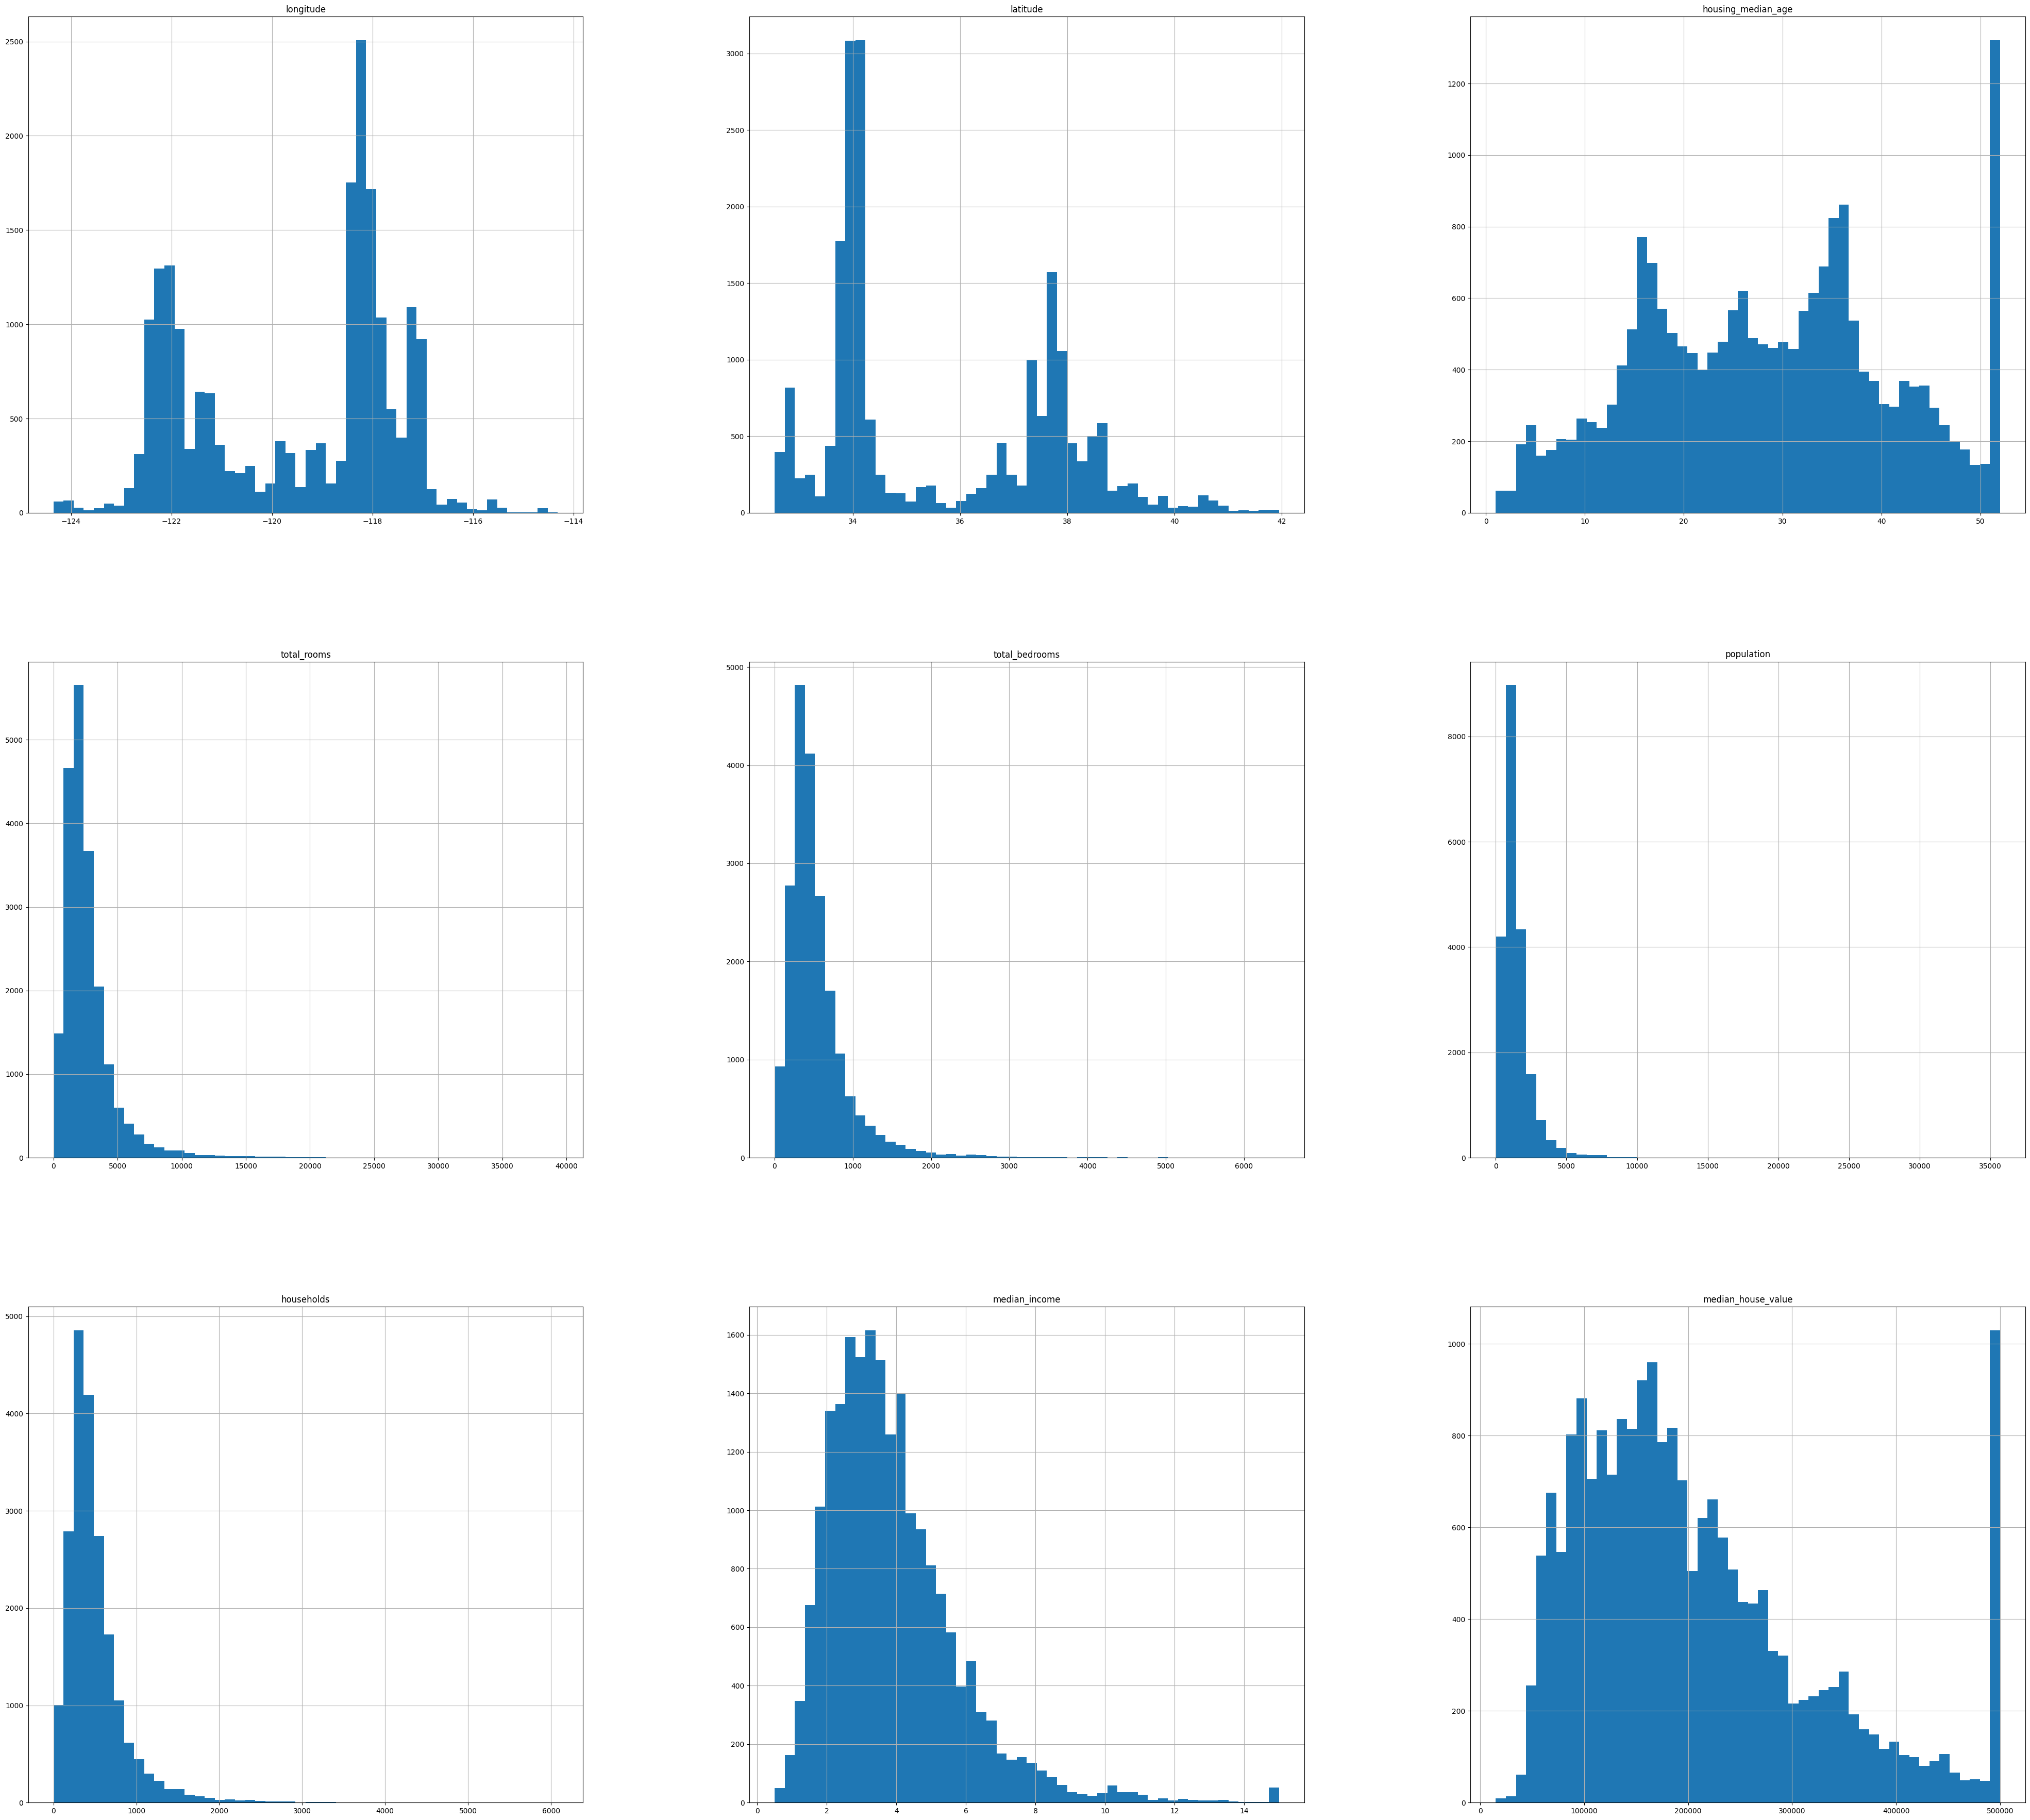

In [6]:
df.hist(bins=50,figsize=(50,45))


In [7]:
import numpy as np

# Create test set


## method_1


In [8]:
def split_train_test(data,test_ratio):
    np.random.seed(42)#fix shuffled data
    shuffled_indices=np.random.permutation(len(data))#so that the df data gets shuffled
    test_set_size=int(len(data)*test_ratio)#u can understand if total 500 then 500*0.2=100 so 100 rows will be used in testing simple :)
    test_indices=shuffled_indices[:test_set_size]#this is telling while choosing test indices fom where to where we have to iterate  here 0 to 100 and among shuffled ones not exact original.
    train_indices=shuffled_indices[test_set_size:]#u understood now
    return data.iloc[train_indices],data.iloc[test_indices]#returning data based on indices.

In [9]:
train_set,test_set=split_train_test(df,0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

## method_2


In [12]:
from zlib import crc32

In [13]:
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff<test_ratio *2**32

In [14]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [15]:
df_with_id=df.reset_index() #add new column name 'index'
train_set,test_set=split_train_test_by_id(df_with_id,0.2,"index")

In [16]:
df_with_id["id"] = df["longitude"] * 1000 + df["latitude"]
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "id")

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## method_3


In [18]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [19]:
len(test_set)

4128

<Axes: >

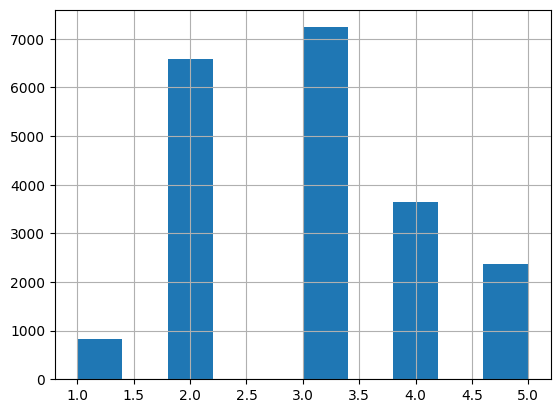

In [20]:
df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])
df["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [22]:
(df["income_cat"].value_counts() / len(df))*100

income_cat
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: count, dtype: float64

In [23]:
# Dropping the "income_cat" column from both strat_train_set and strat_test_set
for set_ in (strat_train_set, strat_test_set):
    if "income_cat" in set_.columns:
        set_.drop("income_cat", axis=1, inplace=True)

# Check if "income_cat" is still in the columns of strat_train_set
print("Columns in strat_train_set:", strat_train_set.columns)

# Check if "income_cat" is still in the columns of strat_test_set
print("Columns in strat_test_set:", strat_test_set.columns)

Columns in strat_train_set: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
Columns in strat_test_set: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [24]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [25]:
strat_train_set.head()  # to check the head of strat_train_set


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [26]:
strat_test_set.head()   # to check the head of strat_test_set


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


# discover and visualise data to gain insights

In [27]:
df=strat_train_set.copy()

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


## visualizing geographical data¶

<Axes: xlabel='longitude'>

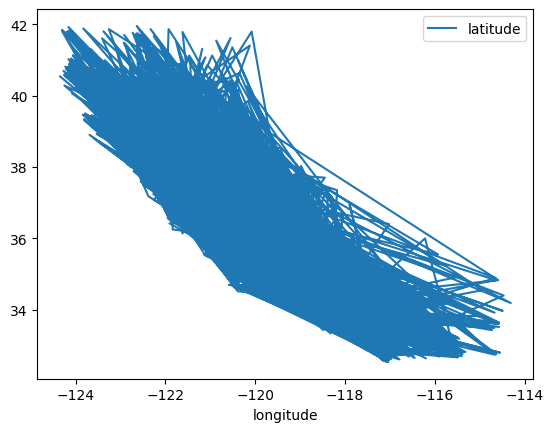

In [29]:
x="longitude"
y="latitude"
df.plot(x,y)

<Axes: xlabel='longitude', ylabel='latitude'>

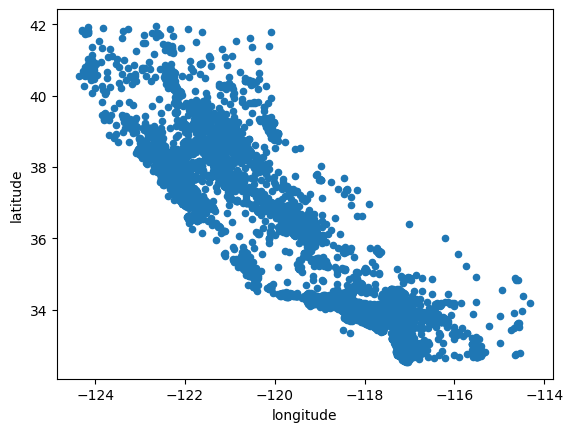

In [30]:
x="longitude"
y="latitude"
df.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

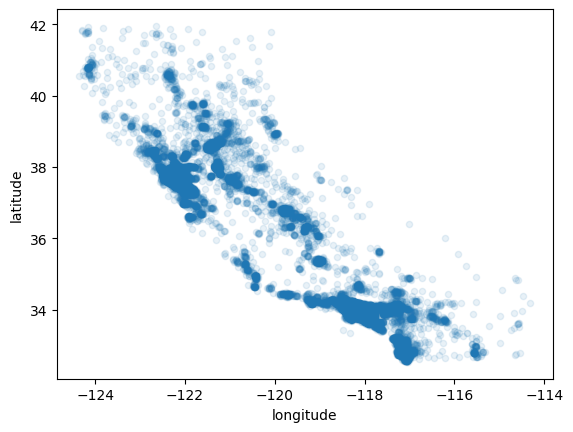

In [31]:
x="longitude"
y="latitude"
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

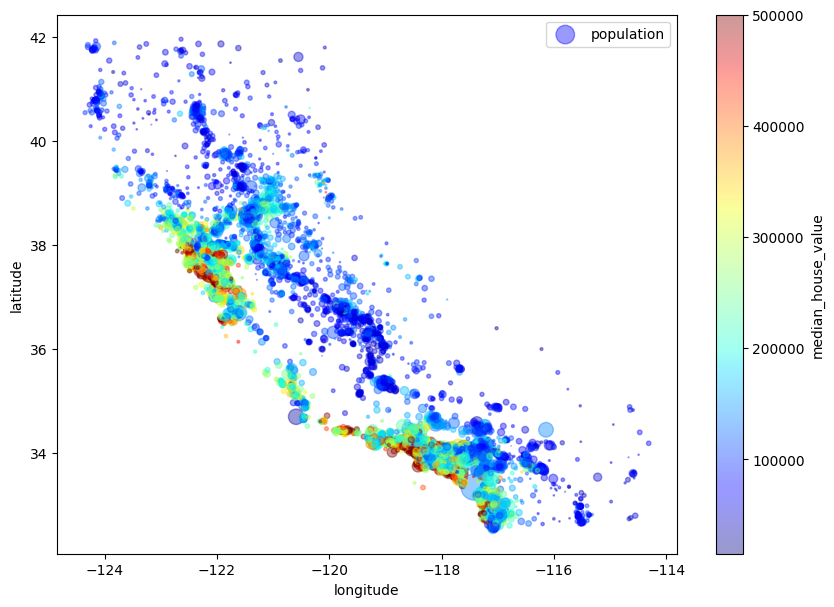

In [32]:
df.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=df["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [33]:

# Assuming df is your DataFrame
# Select columns with numeric data types
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Filter the DataFrame to include only numeric columns
numeric_df = df[numeric_columns]

# Convert non-numeric values to NaN and then convert the DataFrame to float
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
numeric_df = numeric_df.dropna()

# Compute correlation matrix
corr_matrix = numeric_df.corr()

In [34]:
df=numeric_df.copy()

In [35]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0


In [36]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687419
total_rooms           0.134415
housing_median_age    0.114839
households            0.063741
total_bedrooms        0.047781
population           -0.027547
longitude            -0.047017
latitude             -0.143079
Name: median_house_value, dtype: float64

In [37]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]

In [38]:
df["bedrooms_per_rooms"]=df["total_bedrooms"]/df["total_rooms"]

In [39]:
df["population_per_household"]=df["population"]/df["households"]

In [40]:
corr_matrix=df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687419
rooms_per_household         0.145508
total_rooms                 0.134415
housing_median_age          0.114839
households                  0.063741
total_bedrooms              0.047781
population_per_household   -0.021934
population                 -0.027547
longitude                  -0.047017
latitude                   -0.143079
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

In [41]:
df=strat_train_set.drop("median_house_value",axis=1)

In [42]:
df_labels=strat_train_set["median_house_value"].copy()

# Data cleaning

In [43]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [44]:
# sample_incomplete_rows.dropna(subset=["total_bedrooms"]) #getting rid of the corresponding districts

In [45]:
# sample_incomplete_rows.drop("total_bedrooms",axis=1) #get rid of the whole attribute

In [46]:
median=df["total_bedrooms"].median()


In [47]:
median

433.0

In [48]:
sample_incomplete_rows.loc[:, "total_bedrooms"] = sample_incomplete_rows["total_bedrooms"].fillna(median)


In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imputer=SimpleImputer(strategy="median")


In [51]:
df_num=df.drop("ocean_proximity",axis=1)# it is removing non numeric attribute(ocean_proximity)

In [52]:
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [53]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [54]:
df["ocean_proximity"]

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
            ...    
15174     <1H OCEAN
12661        INLAND
19263     <1H OCEAN
19140     <1H OCEAN
19773        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [55]:
x=imputer.transform(df_num)

In [ ]:
df_tr = pd.DataFrame(x, columns=df_num.columns,
                          index=df.index)

In [ ]:
df_tr.loc[sample_incomplete_rows.index.values]

# handling text and categorical attributes


In [ ]:
df_cat=df["ocean_proximity"]

In [ ]:
df

In [ ]:
df_cat.head(10)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming df_cat is a Pandas Series
df_cat_encoded = OrdinalEncoder().fit_transform(df_cat.to_frame())
df_cat_encoded[:10]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
df_cat_hot=cat_encoder.fit_transform(df_cat.to_frame())
df_cat_hot.toarray()

In [ ]:
cat_encoder.categories_

# transformation pipelines

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Custom transformer for adding combined attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Assuming X is a DataFrame with numerical columns
        # Implement your transformation logic here
        # For example, adding new combined attributes
        # For demonstration, let's add two new combined attributes
        combined_attribute1 = X[:, 0] * X[:, 1]  # Example combination of existing attributes
        combined_attribute2 = X[:, 2] / X[:, 3]  # Another example combination
        # Return the original features along with the new combined attributes
        return np.c_[X, combined_attribute1, combined_attribute2]

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'feature1': [1, 2, 3, np.nan, 5],
    'feature2': [5, np.nan, 7, 8, 9],
    'feature3': [10, 11, 12, 13, 14],
    'feature4': [15, 16, np.nan, 18, 19]
})

# Pipeline definition
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),  # Custom transformer
    ('std_scaler', StandardScaler()),
])

# Data transformation using the pipeline
df_num_tr= num_pipeline.fit_transform(df_num)
print(df_num_tr)


In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)#pipeline specifies two transformations: one for numerical attributes and another for categorical attributes.
df_prepaired=full_pipeline.fit_transform(df)
df_prepaired

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# num_attribs = list(df_num)
# cat_attribs = ["ocean_proximity"]

# # Assume 'SomeTransformer' is a custom transformer you've defined elsewhere in your code
# swarn = SomeTransformer()

# full_pipeline = ColumnTransformer([
#         ("num", swarn, num_attribs),
#         ("cat", OneHotEncoder(), cat_attribs),
#     ])

# df_prepared = full_pipeline.fit_transform(df)


# training and evaluating on the training set


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(df_prepaired,df_labels)


In [ ]:
some_data=df.iloc[:5]

In [ ]:
some_labels=df_labels.iloc[:5]

In [ ]:
some_data_prepaired=full_pipeline.transform(some_data)

In [ ]:
predictions = lin_reg.predict(some_data_prepaired)
formatted_predictions = ", ".join(map(str, predictions))
print("Predictions:", formatted_predictions)

In [ ]:
some_labels=df_labels.iloc[:5]

In [ ]:
print("labels:",list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
df_predictions=lin_reg.predict(df_prepaired)

In [ ]:
lin_mse=mean_squared_error(df_labels,df_predictions)

In [ ]:
lin_rmse=np.sqrt(lin_mse)

In [ ]:
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg=DecisionTreeRegressor()

In [ ]:
tree_reg.fit(df_prepaired,df_labels)

In [ ]:
df_predictions=tree_reg.predict(df_prepaired)

In [ ]:
tree_mse=mean_squared_error(df_labels,df_predictions)

In [ ]:
tree_rmse=np.sqrt(tree_mse)

In [ ]:
tree_rmse

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,df_prepaired,df_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_prepared, df_labels)

In [ ]:
housing_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)